In [1]:
#IMPORTING MODULES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [2]:
import nltk
import os
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
train_data=pd.read_csv("train_data.txt",sep=":::",header=None,engine='python')
test_data=pd.read_csv("test_data.txt",sep=":::",header=None,engine='python')
test_data_solution=pd.read_csv("test_data_solution.txt",sep=":::",header=None,engine='python')

In [5]:
print("shape",train_data.shape)
train_data.head()

shape (54214, 4)


,0,1,2,3
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [6]:
print("shape",test_data_solution.shape)
test_data_solution.head()

shape (54200, 4)


,0,1,2,3
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [7]:
df = pd.concat((train_data ,test_data_solution))
df.columns = ["id" ,"Title","Genre","Description"]
df.head()

,id,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [8]:
df.shape

(108414, 4)

DATA PREPROCESSING

In [9]:
df.duplicated().sum()
df.drop_duplicates(inplace = True) 

In [10]:
df.shape

(108414, 4)

In [11]:
stopword = set(stopwords.words('english'))
def preprocessing(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'[#@\$]', '', text)
    tokens = word_tokenize(text)
    lemmatizer  = WordNetLemmatizer()
    text = text.split()
    text = [word for word in text if word not in stopword]
    return " ".join(text) 

In [14]:
df["Despcription_clean"] =  df["Description"].apply(preprocessing)

In [20]:
df.head()

,id,Title,Genre,Description,Despcription_clean
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents 10yearol...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,films title refers unrecovered bodies ground z...


DATA VISUALIZATION

In [21]:
df["Genre"].value_counts()

 drama           27225
 documentary     26192
 comedy          14893
 short           10145
 horror           4408
 thriller         3181
 action           2629
 western          2064
 reality-tv       1767
 family           1567
 adventure        1550
 music            1462
 romance          1344
 sci-fi           1293
 adult            1180
 crime            1010
 animation         996
 sport             863
 talk-show         782
 fantasy           645
 mystery           637
 musical           553
 biography         529
 history           486
 game-show         387
 news              362
 war               264
Name: Genre, dtype: int64

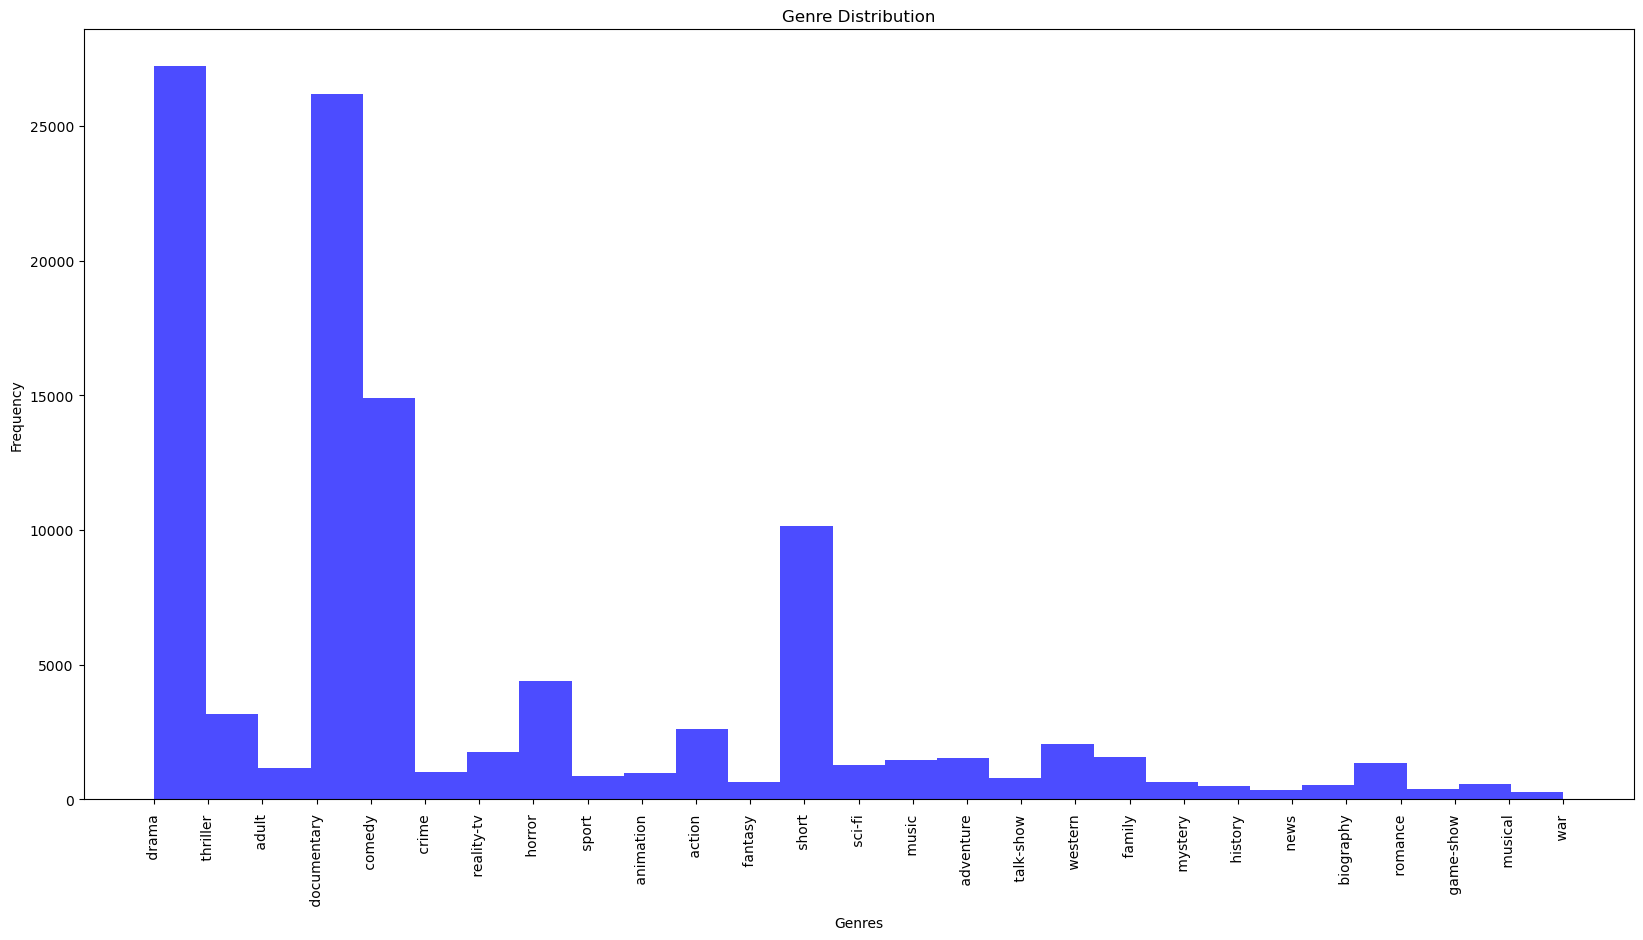

In [22]:
plt.figure(figsize=(20, 10))
plt.hist(df["Genre"],bins =27 , color='blue', alpha=0.7)
plt.title("Genre Distribution")
plt.xlabel("Genres")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

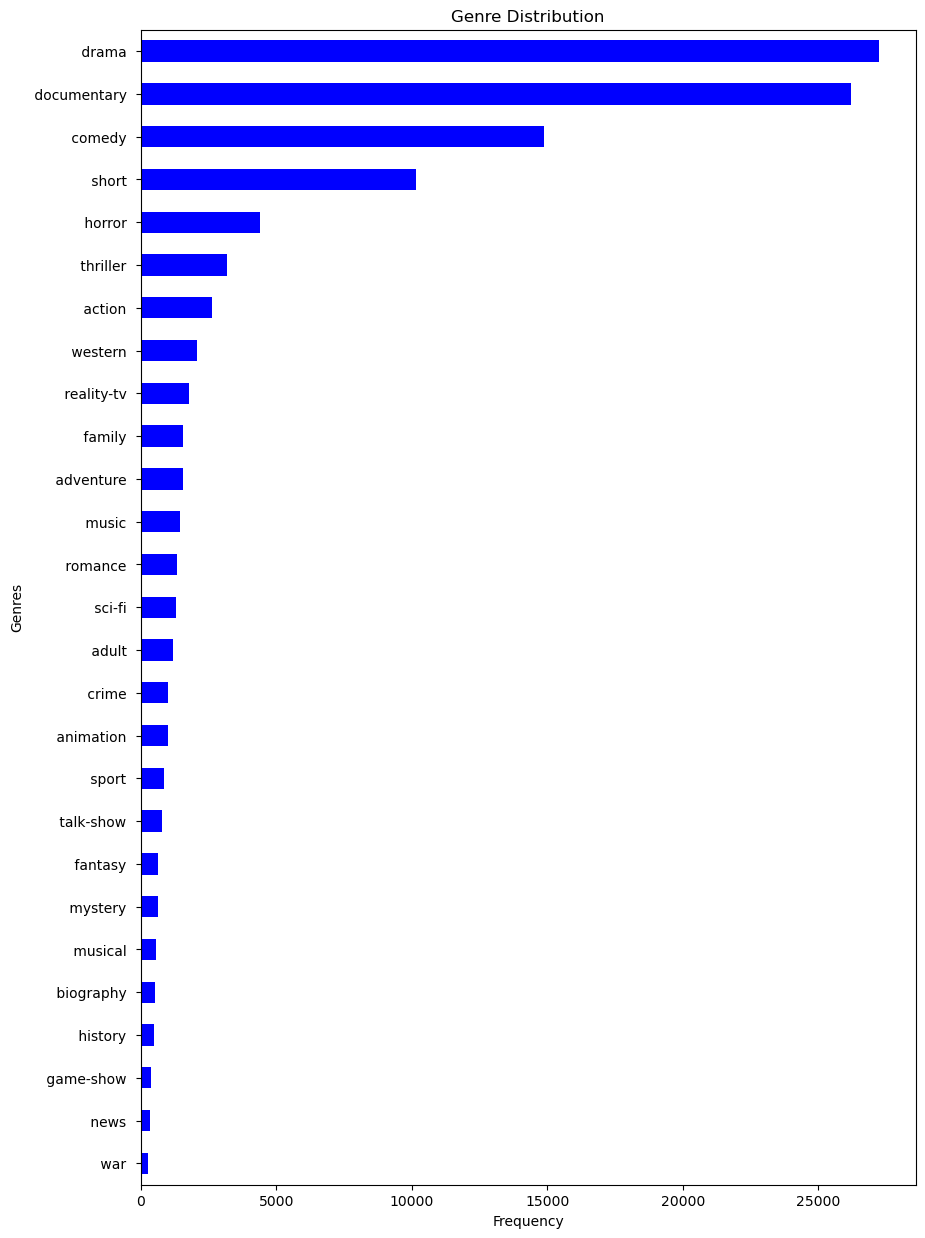

In [23]:

genre_counts = df["Genre"].value_counts()
sorted_genres = genre_counts.sort_values(ascending=True)
plt.figure(figsize=(10, 15))
sorted_genres.plot(kind='barh',color = "blue", alpha=1 )
plt.title("Genre Distribution")
plt.xlabel("Frequency")
plt.ylabel("Genres")
plt.show()

In [24]:
data = df.drop(["Title","id"] , axis = 1)
data.head()

,Genre,Description,Despcription_clean
0,drama,Listening in to a conversation between his do...,listening conversation doctor parents 10yearol...
1,thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
3,drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
4,drama,The film's title refers not only to the un-re...,films title refers unrecovered bodies ground z...


MODEL SELECTION AND TRAINING

In [25]:
label_encoder = LabelEncoder()
data['Genre_encoded'] = label_encoder.fit_transform(data['Genre'])
data['Genre_encoded']
class_names= list(label_encoder.classes_)
class_names 

[' action ',
 ' adult ',
 ' adventure ',
 ' animation ',
 ' biography ',
 ' comedy ',
 ' crime ',
 ' documentary ',
 ' drama ',
 ' family ',
 ' fantasy ',
 ' game-show ',
 ' history ',
 ' horror ',
 ' music ',
 ' musical ',
 ' mystery ',
 ' news ',
 ' reality-tv ',
 ' romance ',
 ' sci-fi ',
 ' short ',
 ' sport ',
 ' talk-show ',
 ' thriller ',
 ' war ',
 ' western ']

In [26]:
data.head()

,Genre,Description,Despcription_clean,Genre_encoded
0,drama,Listening in to a conversation between his do...,listening conversation doctor parents 10yearol...,8
1,thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...,24
2,adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...,1
3,drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...,8
4,drama,The film's title refers not only to the un-re...,films title refers unrecovered bodies ground z...,8


In [27]:
x = data["Despcription_clean"]
y = data["Genre"]
x_train ,x_test ,y_train ,y_test = train_test_split(x ,y ,test_size = 0.5)

In [28]:
vectorize = CountVectorizer()
x_train1 = vectorize.fit_transform(x_train)
x_test1 =  vectorize.transform(x_test)

MULTINOMIAL NAIVE BAYES

Model Score on Training data 0.637685169812017
Model Score on Training data 0.521445569760363
               precision    recall  f1-score   support

      action        0.03      0.59      0.06        70
       adult        0.02      0.61      0.04        18
   adventure        0.05      0.50      0.09        78
   animation        0.00      0.00      0.00         0
   biography        0.00      0.00      0.00         1
      comedy        0.44      0.53      0.48      6199
       crime        0.00      0.00      0.00         1
 documentary        0.90      0.56      0.69     20741
       drama        0.83      0.46      0.59     24698
      family        0.00      1.00      0.00         1
     fantasy        0.00      0.00      0.00         7
   game-show        0.09      1.00      0.17        18
     history        0.00      0.00      0.00         0
      horror        0.26      0.78      0.39       744
       music        0.05      0.93      0.10        43
     musical        0.01 

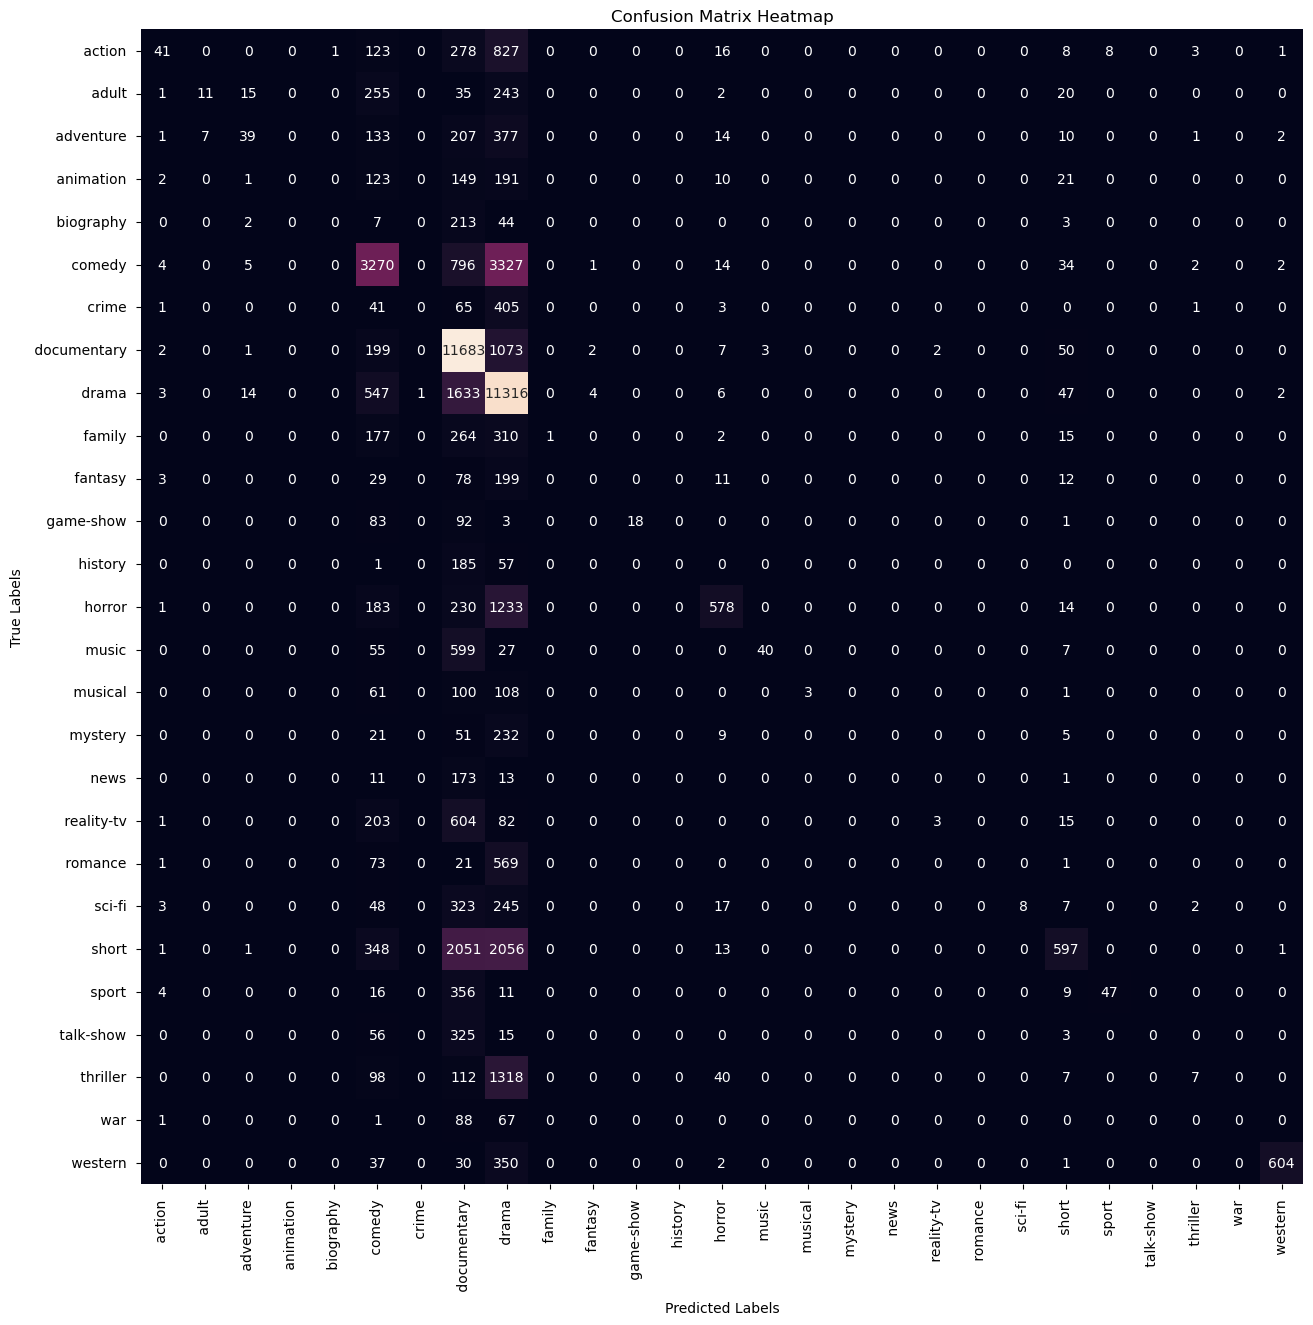

In [29]:
mnb = MultinomialNB()
mnb.fit(x_train1 ,y_train)
print("Model Score on Training data",mnb.score(x_train1 ,y_train))
print("Model Score on Training data",mnb.score(x_test1 ,y_test))
y_pred = mnb.predict(x_test1)
print(classification_report(y_pred ,y_test))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15, 15)) 
sns.heatmap(cm, annot=True, fmt='d', cbar=False,xticklabels=class_names, yticklabels=class_names) 
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()  

LOGISTIC REGRESSION

Model Score on Training data 0.996993008283063
Model Score on Training data 0.5670300883649713
               precision    recall  f1-score   support

      action        0.32      0.41      0.36      1043
       adult        0.39      0.61      0.47       374
   adventure        0.23      0.43      0.30       421
   animation        0.17      0.39      0.23       211
   biography        0.02      0.11      0.03        44
      comedy        0.58      0.52      0.55      8205
       crime        0.10      0.26      0.15       207
 documentary        0.79      0.70      0.74     14635
       drama        0.68      0.56      0.62     16424
      family        0.19      0.35      0.24       410
     fantasy        0.12      0.33      0.17       117
   game-show        0.60      0.82      0.70       145
     history        0.02      0.08      0.03        48
      horror        0.57      0.62      0.60      2060
       music        0.49      0.63      0.55       566
     musical        0.10

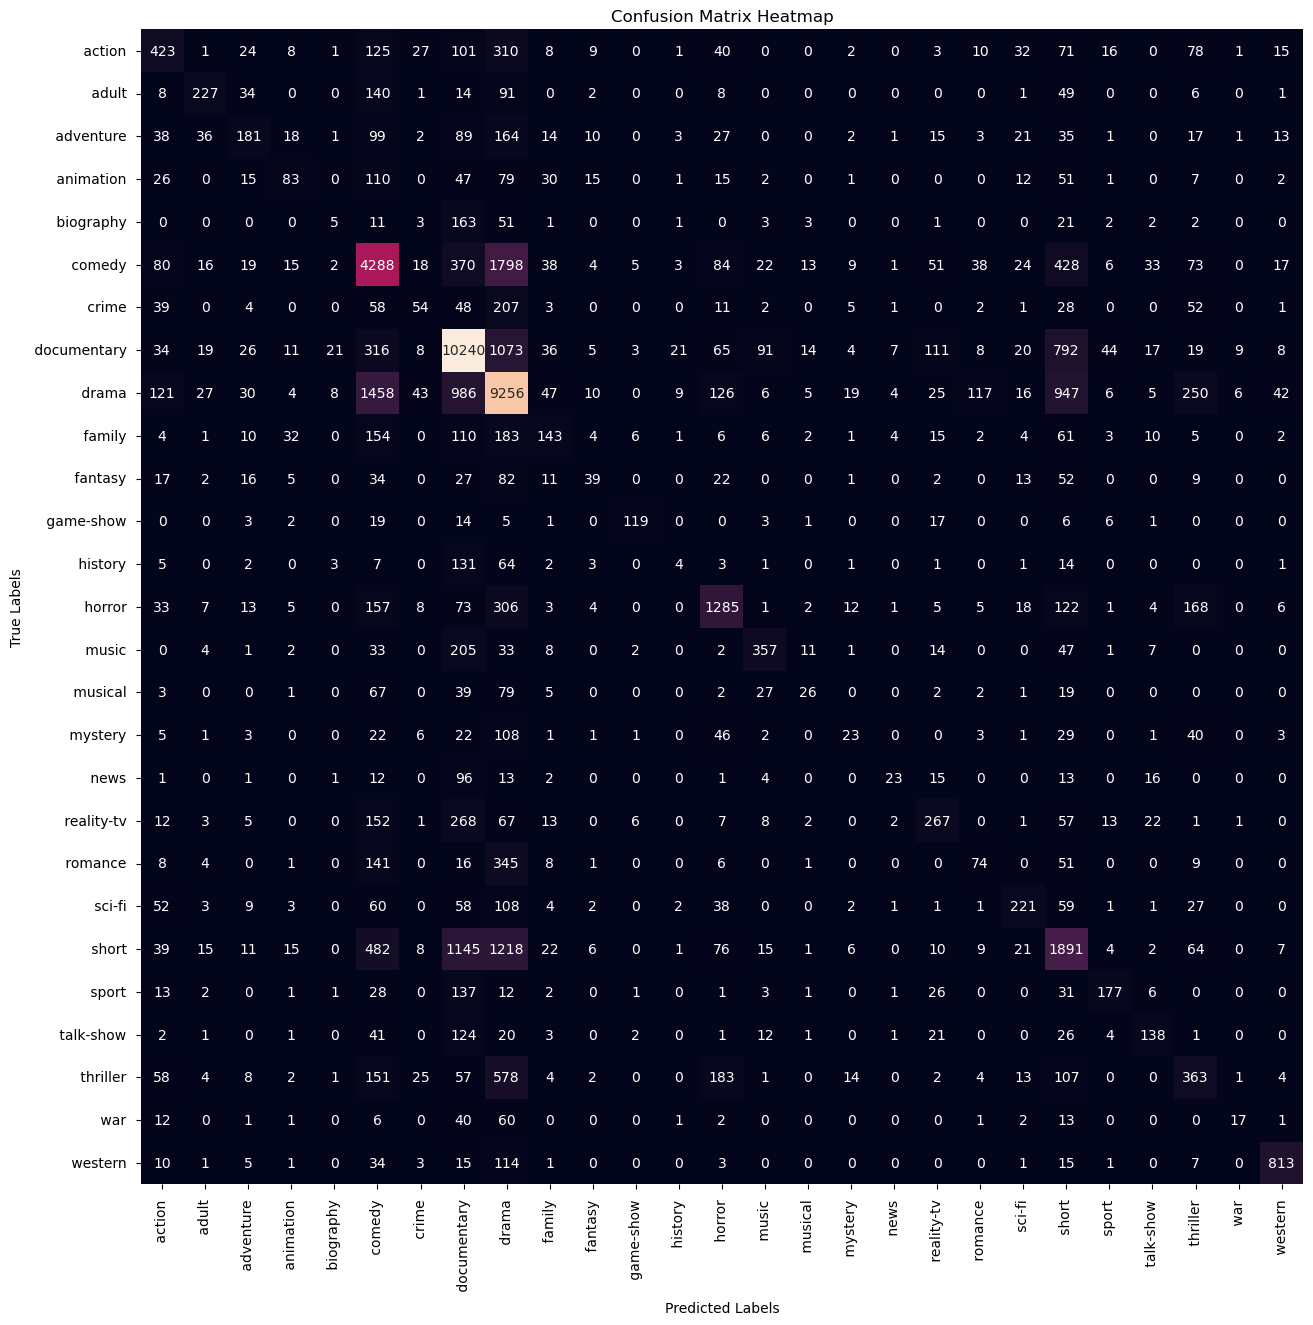

In [30]:
model = LogisticRegression()
model.fit(x_train1 ,y_train)
print("Model Score on Training data",model.score(x_train1 ,y_train))
print("Model Score on Training data",model.score(x_test1 ,y_test))
y_pred = model.predict(x_test1)
print(classification_report(y_pred ,y_test))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15, 15)) 
sns.heatmap(cm, annot=True, fmt='d', cbar=False,xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

SVC

Model Score on Training data 0.999631043961112
Model Score on Training data 0.518014278598705
               precision    recall  f1-score   support

      action        0.28      0.33      0.30      1131
       adult        0.38      0.47      0.42       468
   adventure        0.22      0.31      0.26       562
   animation        0.16      0.25      0.20       317
   biography        0.01      0.02      0.01       123
      comedy        0.51      0.49      0.50      7665
       crime        0.10      0.14      0.12       347
 documentary        0.73      0.69      0.71     13861
       drama        0.61      0.54      0.57     15189
      family        0.18      0.22      0.20       627
     fantasy        0.11      0.18      0.14       203
   game-show        0.61      0.73      0.66       165
     history        0.02      0.04      0.02       106
      horror        0.55      0.55      0.55      2229
       music        0.48      0.56      0.52       632
     musical        0.10 

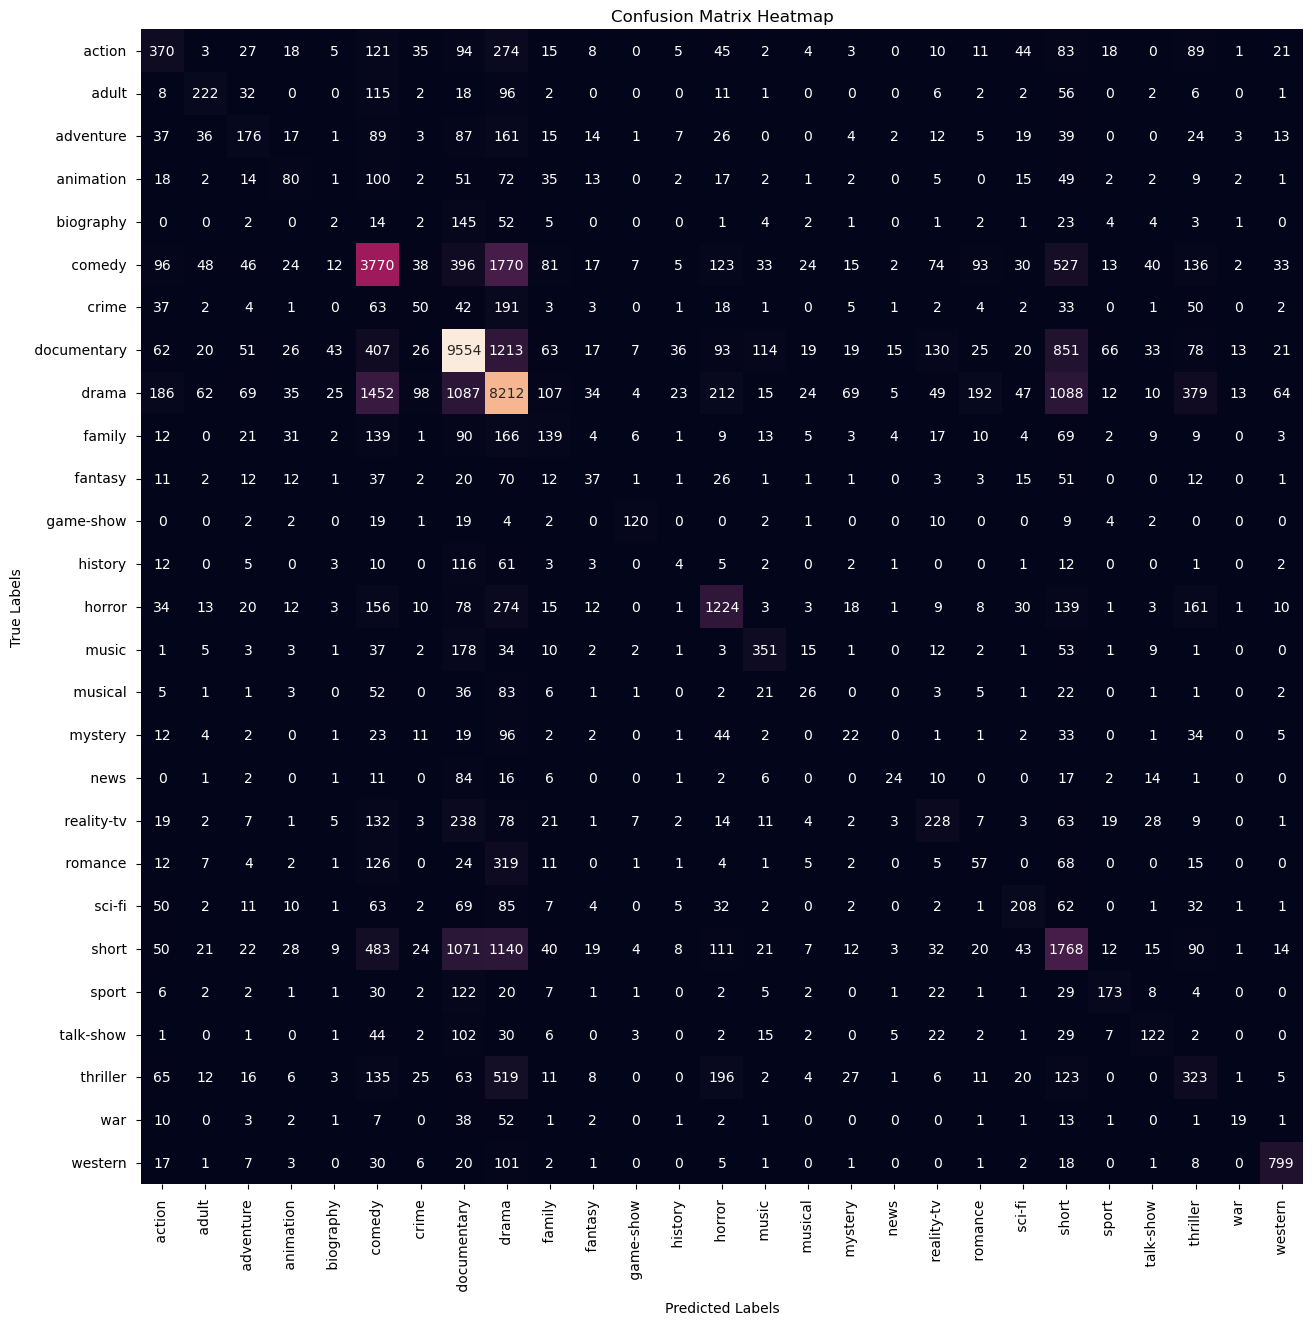

In [32]:
svm = LinearSVC()
svm.fit(x_train1 ,y_train)
print("Model Score on Training data",svm.score(x_train1 ,y_train))
print("Model Score on Training data",svm.score(x_test1 ,y_test))
y_pred = svm.predict(x_test1)
print(classification_report(y_pred ,y_test))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()